# Ridge Regression

Ridge Regression의 경우 Ordinary Least Squares (일반적인 linear regression)에다가 coefficients(weights)값의 크기에 penalty를 줌으로서 regularization을 합니다.

$$ \| Xw -y \|_2^2 + \alpha \| w \|_2^2 $$

In [6]:
%pylab inline
import numpy as np
from sklearn.linear_model import Ridge

Populating the interactive namespace from numpy and matplotlib


### Data

**x값**은 1에다가 다음의 값을 나눈것과 같습니다. <br>
즉 숫자가 커지면 커질수록 1로 나누기 때문에 결론적으로 값은 작아집니다.<br>
따라서 rows를 따라 내려가면 내려갈수록 값은 작아집니다. 

```
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]
 ```
 
 **alphas**의 경우 10^-10 부터 시작해서 10^0 으로 값이 커지는 vector값입니다.<br>
 대충 이렇게 생겼습니다.
 
 ```
 [1^-10, 1^-9, 1^-8, ... 1^0]
 ```

In [24]:
x = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
x = np.round(x, decimals=3)
y = np.ones(10)

print(x)

[[ 1.     0.5    0.333  0.25   0.2    0.167  0.143  0.125  0.111  0.1  ]
 [ 0.5    0.333  0.25   0.2    0.167  0.143  0.125  0.111  0.1    0.091]
 [ 0.333  0.25   0.2    0.167  0.143  0.125  0.111  0.1    0.091  0.083]
 [ 0.25   0.2    0.167  0.143  0.125  0.111  0.1    0.091  0.083  0.077]
 [ 0.2    0.167  0.143  0.125  0.111  0.1    0.091  0.083  0.077  0.071]
 [ 0.167  0.143  0.125  0.111  0.1    0.091  0.083  0.077  0.071  0.067]
 [ 0.143  0.125  0.111  0.1    0.091  0.083  0.077  0.071  0.067  0.062]
 [ 0.125  0.111  0.1    0.091  0.083  0.077  0.071  0.067  0.062  0.059]
 [ 0.111  0.1    0.091  0.083  0.077  0.071  0.067  0.062  0.059  0.056]
 [ 0.1    0.091  0.083  0.077  0.071  0.067  0.062  0.059  0.056  0.053]]


In [26]:
n_alphas = 200
alphas = np.logspace(-10, 0, n_alphas) # 10**np.linspace(-10, 0, n_alphas)

### Ridge Model

for문을 돌때마다 점점 더 큰 값이 들어가게 됩니다. <br>
즉 그래프를 보듯이 alpha값이 커지면 커질수록 weights값들의 변화량이 적고.. 이는 overfitting을 제한시켜줍니다.<br>
즉.. generalization해줍니다. 특정 wegith값들이 너무 크거나 작거나 하지 않고..

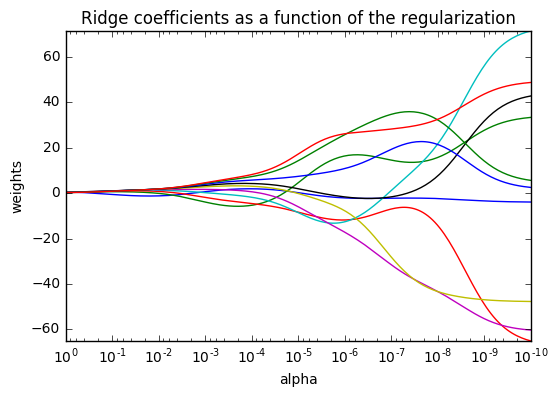

In [27]:
model = Ridge(fit_intercept=False)
model.fit(x, y)

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(x, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()